In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree

%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 7.0)

### Importamos dataset
* Almecenamos dataset como objeto DataFrame de pandas y se configura para que se muetren todas las columnas.
* Se visualizan las primeras 10 columnas del conjunto de datos.
* Se visualizan información de las variables del dataset


In [3]:
data = pd.read_csv('housing_train.csv')
pd.set_option("display.max_rows", 30, "display.max_columns", None)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Discriminar entre variables numericas y categoricas
* Variables numericas: maximo, minimo, media, mediana y cuartiles.
* variables categoricas: listado categorias y frecuencia aparicion

In [5]:
variables_num = list(data._get_numeric_data().columns)
variables_cat = list(set(data.columns) - set(variables_num))

print('Variables númericas:')
print(variables_num)
print('\n')
print('Variables categoricas:')
print(variables_cat)

Variables númericas:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Variables categoricas:
['GarageCond', 'MiscFeature', 'PoolQC', 'LotShape', 'Street', 'BsmtExposure', 'Heating', 'SaleType', 'Condition2', 'ExterQual', 'Electrical', 'HouseStyle', 'Alley', 'Neighborhood', 'KitchenQual', 'FireplaceQu', 'Fence', 'BsmtCond', 'Utilities', 'GarageQual', 'BsmtFinType2', 'LotConfig', 'SaleCondition', 'PavedDrive', 'Functional', 'HeatingQC', 'CentralAir', 'GarageFinish', 'RoofMatl', 'RoofStyle', 'LandSlope', 'MSZoning', 'MasVnrT

In [6]:
print('Datos estadíticos de las variables númericas:')
for column in variables_num:
    cuartiles = data[column].quantile([.25, .50, .75])

    print('Variable ' + column + ':')
    print('MAX:', data[column].max())
    print('MIN:', data[column].min())
    print('MEDIA:', data[column].mean())
    print('MEDIANA:', data[column].median())
    print('25%:', cuartiles.iloc[0])
    print('50%:', cuartiles.iloc[1])
    print('75%:', cuartiles.iloc[2])
    print('\n')

Datos estadíticos de las variables númericas:
Variable Id:
MAX: 1460
MIN: 1
MEDIA: 730.5
MEDIANA: 730.5
25%: 365.75
50%: 730.5
75%: 1095.25


Variable MSSubClass:
MAX: 190
MIN: 20
MEDIA: 56.897260273972606
MEDIANA: 50.0
25%: 20.0
50%: 50.0
75%: 70.0


Variable LotFrontage:
MAX: 313.0
MIN: 21.0
MEDIA: 70.04995836802665
MEDIANA: 69.0
25%: 59.0
50%: 69.0
75%: 80.0


Variable LotArea:
MAX: 215245
MIN: 1300
MEDIA: 10516.828082191782
MEDIANA: 9478.5
25%: 7553.5
50%: 9478.5
75%: 11601.5


Variable OverallQual:
MAX: 10
MIN: 1
MEDIA: 6.0993150684931505
MEDIANA: 6.0
25%: 5.0
50%: 6.0
75%: 7.0


Variable OverallCond:
MAX: 9
MIN: 1
MEDIA: 5.575342465753424
MEDIANA: 5.0
25%: 5.0
50%: 5.0
75%: 6.0


Variable YearBuilt:
MAX: 2010
MIN: 1872
MEDIA: 1971.267808219178
MEDIANA: 1973.0
25%: 1954.0
50%: 1973.0
75%: 2000.0


Variable YearRemodAdd:
MAX: 2010
MIN: 1950
MEDIA: 1984.8657534246574
MEDIANA: 1994.0
25%: 1967.0
50%: 1994.0
75%: 2004.0


Variable MasVnrArea:
MAX: 1600.0
MIN: 0.0
MEDIA: 103.6852617079

In [7]:
for column in variables_cat:
    print(f'Variable {column}:')
    print(f'Listado categorias: \n{data[column].unique()}')
    print(f'Frecuencia categorias: \n{data[column].value_counts()}')
    print('\n')

Variable GarageCond:
Listado categorias: 
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Frecuencia categorias: 
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Variable MiscFeature:
Listado categorias: 
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
Frecuencia categorias: 
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


Variable PoolQC:
Listado categorias: 
[nan 'Ex' 'Fa' 'Gd']
Frecuencia categorias: 
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


Variable LotShape:
Listado categorias: 
['Reg' 'IR1' 'IR2' 'IR3']
Frecuencia categorias: 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Variable Street:
Listado categorias: 
['Pave' 'Grvl']
Frecuencia categorias: 
Pave    1454
Grvl       6
Name: Street, dtype: int64


Variable BsmtExposure:
Listado categorias: 
['No' 'Gd' 'Mn' 'Av' nan]
Frecuencia categorias: 
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


Variable Heating:
Listado categor

### Matriz de correlación
* Calcular la matriz de correlación
* Visualizar matriz de correlación

In [8]:
df_matrix_corr = data.corr().abs()
df_matrix_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,0.010601,0.033226,0.028365,0.012609,0.012713,0.021998,0.050298,0.005024,0.005968,0.007940,0.015415,0.010496,0.005590,0.044230,0.008273,0.002289,0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,0.019772,0.000072,0.016570,0.017634,0.029643,0.000477,0.002889,0.046635,0.001330,0.057044,0.006242,0.021172,0.000712,0.021917
MSSubClass,0.011156,1.000000,0.386347,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,0.065649,0.140759,0.238518,0.251758,0.307886,0.046474,0.074853,0.003491,0.002333,0.131608,0.177354,0.023438,0.281721,0.040380,0.045569,0.085072,0.040110,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284
LotFrontage,0.010601,0.386347,1.000000,0.426095,0.251646,0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,0.007234,0.198769,0.053532,0.263170,0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.033226,0.139781,0.426095,1.000000,0.105806,0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.017784,0.190015,0.271364,0.024947,0.154871,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,0.028365,0.032628,0.251646,0.105806,1.000000,0.091932,0.572323,0.550684,0.411876,0.239666,0.059119,0.308159,0.537808,0.476224,0.295493,0.030429,0.593007,0.111098,0.040150,0.550600,0.273458,0.101676,0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolArea,0.057044,0.008283,0.206167,0.077672,0.065166,0.001985,0.004950,0.005829,0.011723,0.140491,0.041709,0.035092,0.126053,0.131525,0.081487,0.062157,0.170205,0.067616,0.020025,0.049604,0.022381,0.070703,0.014525,0.083757,0.095074,0.014501,0.020934,0.061047,0.073378,0.060762,0.054203,0.007992,0.051307,1.000000,0.029669,0.033737,0.059689,0.092404
MiscVal,0.006242,0.007683,0.003368,0.038068,0.031406,0.068777,0.034383,0.010286,0.029815,0.003571,0.004940,0.023837,0.018479,0.021096,0.016197,0.003793,0.002416,0.023047,0.007367,0.014290,0.001290,0.007767,0.062341,0.024763,0.001409,0.032417,0.043080,0.027400,0.009551,0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,0.006495,0.004906,0.021190
MoSold,0.021172,0.013585,0.011200,0.001205,0.070815,0.003511,0.012398,0.021490,0.005965,0.015727,0.015211,0.034888,0.013196,0.031372,0.035164,0.022174,0.050240,0.025361,0.032873,0.055872,0.009050,0.046544,0.026589,0.036907,0.046357,0.005337,0.040522,0.027974,0.021011,0.071255,0.028887,0.029474,0.023217,0.033737,0.006495,1.000000,0.145721,0.046432
YrSold,0.000712,0.021407,0.007450,0.014261,0.027347,0.043950,0.013618,0.035743,0.008201,0.014359,0.031706,0.041258,0.014969,0.013604,0.028700,0.028921,0.036526,0.067049,0.046524,0.019669,0.010269,0.036014,0.031687,0.034516,0.024096,0.001014,0.039117,0.027378,0.022270,0.057619,0.009916,0.018645,0.010694,0.059689,0.004906,0.145721,1.000000,0.028923


Con solo representar el tringulo inferior es suficiente, ya que la que son los mismos datos. Para ello, utilizaremos una mascara.

In [9]:
mask = np.triu(np.ones(df_matrix_corr.shape)).astype(np.bool)
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

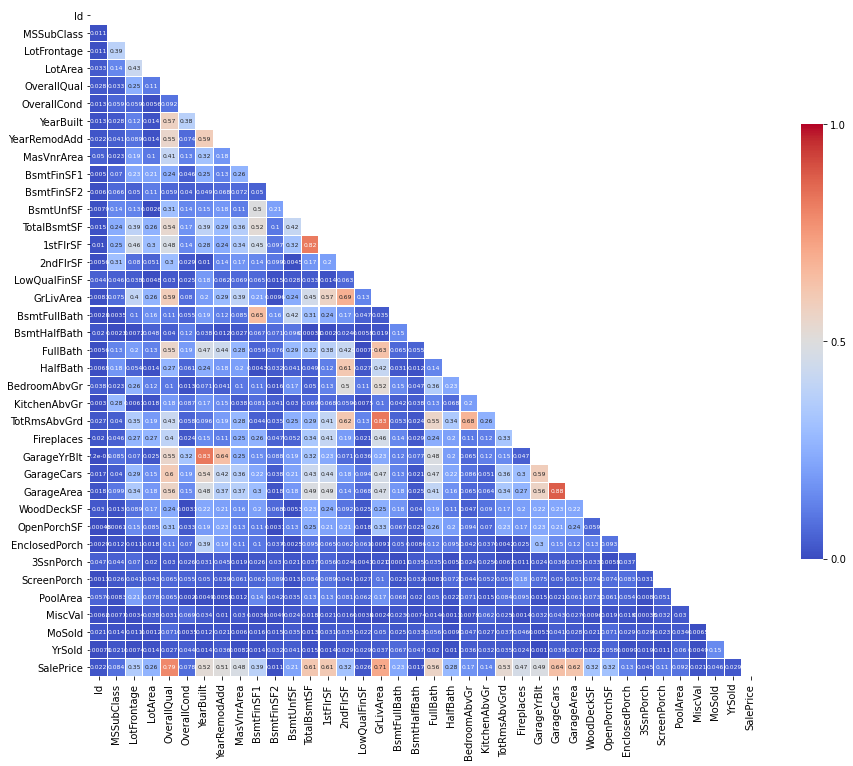

In [10]:
f, ax = plt.subplots(figsize=(15, 20))
ax.set_yticklabels(df_matrix_corr.columns[1:], rotation=0)
ax.set_xticklabels(df_matrix_corr.columns[:-1], rotation=45)
heatmap = sns.heatmap(
    df_matrix_corr,
    mask=mask,
    square=True,
    linewidths=.1,
    cmap='coolwarm',
    cbar_kws={'shrink': .4, 'ticks': [-1, -.5, 0, 0.5, 1]},
    vmin=0,
    vmax=1,
    annot=True,
    annot_kws={"size": 6}
)

### Encontrar las correlaciones más altas, que superen 0.75

Comentar analisis entre las variables


In [11]:
corr_stack = df_matrix_corr.where(mask).stack().reset_index()
corr_stack.columns = ['Row','Column','Correlation Value']
corr_75 = corr_stack[(corr_stack['Correlation Value'] > 0.75) & (corr_stack['Correlation Value'] < 1)].sort_values(by='Correlation Value',kind="quicksort", ascending=False).drop_duplicates(keep='first')
corr_75

,Row,Column,Correlation Value
664,GarageCars,GarageArea,0.882475
232,YearBuilt,GarageYrBlt,0.825667
495,GrLivArea,TotRmsAbvGrd,0.825489
391,TotalBsmtSF,1stFlrSF,0.819530
179,OverallQual,SalePrice,0.790982


### Calcular percentage de nulos de todas las columnas, filtrar por las que superen 0%.

In [12]:
percent_null = (data.isnull().sum()[data.isnull().sum() > 0] / len(data)) * 100
percent_null

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Se eliminan las columnas columnas que superen el 10% nulos.

In [13]:
higher_10 = [
    column for column in percent_null.index if percent_null[column] > 10.0]
data_clean = data.drop(columns=higher_10) 
(data_clean.isnull().sum()[data_clean.isnull().sum() > 0] / len(data)) * 100

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

### Identificar columnas que no superan el 10% (Añadir que las que tienen valores de 0% no se han añadido)

In [14]:
lower_10 = [
    column for column in percent_null.index if percent_null[column] <= 10.0]
lower_10

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### Analizar las variables de garage y remplazar NaN con la categoria None.
Esto debe significar que estas casas no tienen garaje, por lo tanto se va a reemplazar los valores NaN por una nueva categoría llamada 'None':

In [15]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for garage_column in garage_columns:
    print(garage_column + ':')
    print('Se han encontrado',data_clean[garage_column].isnull().sum(), 'nulos')
    data_clean[garage_column] = data_clean[garage_column].fillna('None')
    print('Se han añadido', data_clean[garage_column].value_counts()['None'], 'None\n')



GarageType:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageYrBlt:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageFinish:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageQual:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageCond:
Se han encontrado 81 nulos
Se han añadido 81 None



### Analizar la variable MasVnrArea y MasVnrType

In [16]:
data_clean['MasVnrType'] = data_clean['MasVnrType'].fillna("None")
print(data_clean['MasVnrType'].value_counts()['None'], '\n')

data_clean['MasVnrArea'] = data_clean['MasVnrArea'].fillna(0)
print(data_clean['MasVnrArea'].value_counts()[0], '\n')

872 

869 



### Elegir dos variables categóricas diferentes a las relacionadas con garage, analizar la mejor forma de reemplazar valores nulos. 

In [17]:
sotano_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for column in sotano_cat:
    data_clean[column] = data_clean[column].fillna(data_clean[column].mode()[0])
    print(data_clean[column].value_counts(), '\n')

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 



### En las demás variables categóricas los valores nulos los podemos reemplazar con la moda y las variables numéricas con cero


In [18]:
print('Nulos Electrical:', data_clean.Electrical.isnull().sum())
data_clean.Electrical = data_clean.Electrical.fillna('None')
print('Nulos Electrical:', data_clean.Electrical.isnull().sum())
data_clean['Electrical'].unique()

# No tiene valores

Nulos Electrical: 1
Nulos Electrical: 0


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'None'], dtype=object)

### Verificar que no existen valores NA en el conjunto de datos

In [19]:
data_clean.isnull().sum()[data_clean.isnull().sum() > 0]


Series([], dtype: int64)

### Eliminamos la columna de Id ya que no es necesaria para alimentar los modelos, no proporciona información relevante.

In [20]:
data_clean = data_clean.drop(columns='Id')

In [21]:
data_clean.to_csv('housing_train_clean')

### Preprocesado de los datos
* Para que tipo de enconding es mejor? One hot encoding o simplemente transformar variables categoricas en numericas? -> Para estos algoritmos

In [22]:
model_train = data_clean.copy()

for nombre_columna in data_clean.columns:
    if model_train[nombre_columna].dtype == 'object':
        model_train[nombre_columna] = pd.Categorical(model_train[nombre_columna]).codes
model_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,89,2,2,548,5,5,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,62,2,2,460,5,5,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,87,2,2,608,5,5,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,84,3,3,642,5,5,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,86,2,3,836,5,5,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [23]:
np.random.seed(123)
X = model_train.drop(columns ="SalePrice")
y = model_train["SalePrice"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print('Datos entrenamiento:', x_train.shape, y_train.shape)
print('Datos test:', x_test.shape, y_test.shape)


Datos entrenamiento: (1168, 73) (1168,)
Datos test: (292, 73) (292,)


In [25]:
decision_tree = DecisionTreeRegressor(random_state=0)
params = {'max_depth':np.arange(1, 50, 2),
        'min_samples_leaf':np.arange(2, 30)}

gs_decision_tree = GridSearchCV(decision_tree, params, cv=7)
gs_decision_tree.fit(x_train, y_train)
best_params = gs_decision_tree.best_params_

print("Grid Search:")
print(gs_decision_tree)
print("Best params:")
print(best_params)

Grid Search:
GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})
Best params:
{'max_depth': 11, 'min_samples_leaf': 18}


In [28]:
dtr = DecisionTreeRegressor(max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [27]:
msle = mean_squared_log_error(y_pred,y_test)
rmsle = np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

r_texto = tree.export_text(dtr)
print(r_texto)

RMLSE for the data: 0.1886025511726304
MAE: 24346.109633568423
MSE: 1527585120.696698
|--- feature_14 <= 7.50
|   |--- feature_14 <= 6.50
|   |   |--- feature_43 <= 1378.50
|   |   |   |--- feature_35 <= 969.50
|   |   |   |   |--- feature_38 <= 0.50
|   |   |   |   |   |--- feature_43 <= 930.00
|   |   |   |   |   |   |--- value: [76229.55]
|   |   |   |   |   |--- feature_43 >  930.00
|   |   |   |   |   |   |--- value: [96775.15]
|   |   |   |   |--- feature_38 >  0.50
|   |   |   |   |   |--- feature_58 <= 298.00
|   |   |   |   |   |   |--- feature_2 <= 5950.00
|   |   |   |   |   |   |   |--- value: [92441.94]
|   |   |   |   |   |   |--- feature_2 >  5950.00
|   |   |   |   |   |   |   |--- feature_31 <= 330.00
|   |   |   |   |   |   |   |   |--- value: [109040.62]
|   |   |   |   |   |   |   |--- feature_31 >  330.00
|   |   |   |   |   |   |   |   |--- value: [120500.00]
|   |   |   |   |   |--- feature_58 >  298.00
|   |   |   |   |   |   |--- feature_14 <= 4.50
|   |   |   